# Capstone Project Apprenticeship

Name: Dámaris Flores Albores  
Date: April 2023

## The Steps

1.- For this project I will start by evaluating the business needs and determine our key questions from which I will start the data exploration an analysis.(*Business Understanding*)

2.- After that I will do a first data exploration of the dataset and determined (based on actual resources and timeline) the features to work with. (*Data Understanding*)

3.- The next step will be cleaning the dataset: look for null data, renaming columns and changing the type of certain columns for analysis purposes. (*Data Preparation*)

4.- More data exploration. I will decode de dataset and look for inconsistencies and some first descriptive statistics to have a better understanding of the data.

5.- I will start with a vanilla regression model as a starting point.(*Modeling*)

6.- I will try with a classification model. For that I will have to create a new column with the categories implemented.

7.- It's to tune the model by trying different approaches. (*Evaluation*)

8.- Explore further approaches. Sugestion of next steps for a deeper analysis. 

### Let's start!



# Business Understanding

In order to understand the mexican context and design better public policies, the ENOE (National Survey of Occupation and Employment) collects information from the population. However, 30% of the people who are surveyed do not answer how much they earn.  
The purpose of this project is to make accurate income predictions based on the known data. The income predictor helps by filling in the missing data for better social analytics purposes. 

It also gives us the opportunity to highlight the inequalities and to analize how much does some feautures are factors into determining income.  




# Data Understanding 

First a preliminary data exploration of our dataset for better understanding.

In [3]:
# Start by importing all the libraries we will be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
from scipy import stats 
import math

In [5]:
# Starting with reading actual dataset and its dictionary

enoe = pd.read_csv('Data/conjunto_de_datos_sdem_enoen_2022_4t.csv', encoding='latin')
dictionary = pd.read_csv('Data/diccionario_datos_sdem_enoen_2022_4t.csv', encoding='latin')

# Understanding dictionary csv (the first five entries)

dictionary.head()

,NOMBRE_CAMPO,LONGITUD,TIPO,NEMÓNICO,CATÁLOGO,RANGO_CLAVES
0,Resultado definitivo de la entrevista,2,C,r_def,r_def,"00,15 ..."
1,Número de la localidad,4,C,loc,loc,0001-9998
2,Número de municipio según entidad,3,C,mun,mun,001-575
3,Estrato nacional y estatal,2,C,est,NaN,"Primer dígito 1-4, Segundo dígito 0-4"
4,Estrato de diseño trimestral,4,C,est_d_tri,NaN,0001-9999


In [6]:
# Understanding enoe csv
# Number of entries, columns and types

enoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396629 entries, 0 to 396628
Columns: 114 entries, r_def to mes_cal
dtypes: float64(1), int64(82), object(31)
memory usage: 345.0+ MB


In [7]:
#The first five entries

enoe.head()

,r_def,loc,mun,est,est_d_tri,est_d_men,ageb,t_loc_tri,t_loc_men,cd_a,...,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins,tipo,mes_cal
0,0,,2,10,122,,0,1,,1,...,12,1,2,2,0,3,2,2,1,99
1,0,,2,10,122,,0,1,,1,...,0,1,0,0,0,0,0,0,1,99
2,0,,2,10,122,,0,1,,1,...,12,1,2,2,0,3,2,2,1,99
3,0,,2,10,122,,0,1,,1,...,0,1,0,0,0,0,0,0,1,99
4,0,,2,10,122,,0,1,,1,...,14,1,2,2,0,3,2,2,1,99


### Conclusion of first exploration of data

After the first exploration we can find the enoe database is huge and with way too much information, given the timeline I will choose a maximum of 15 columns to work with and strip the rest. 
For that I will need to understand what does each column means and how much valuable information i can get with them.

In [8]:
with pd.option_context('display.max_rows', None,):
   print(dictionary['NOMBRE_CAMPO'])

0                  Resultado definitivo de la entrevista
1                                 Número de la localidad
2                      Número de municipio según entidad
3                             Estrato nacional y estatal
4                           Estrato de diseño trimestral
5                              Estrato de diseño mensual
6                      Número de ageb del marco nacional
7                         Tamaño de localidad trimestral
8                            Tamaño de localidad mensual
9                               Ciudad autorrepresentada
10                                               Entidad
11                                               Control
12                           Unidad primaria de muestreo
13                                  Distribución semanal
14                      Número progresivo de la vivienda
15                                 Vivienda seleccionada
16                                       Número de hogar
17                             

By looking at the data dictionary, I decide to explore further Columns 10, 23, 24, 29, 36, 37, 49, 50, 54, 57, 59, 61, 94, 96
before deciding which ones I want to use. For that I will need to know the codification of each of them (this information is in additionals csv's for each column)

In [10]:
new_dict = dictionary.iloc[[10, 23, 24, 29, 30, 32, 36, 37, 49, 50, 54, 57, 59, 61, 94, 96]]
new_dict

,NOMBRE_CAMPO,LONGITUD,TIPO,NEMÓNICO,CATÁLOGO,RANGO_CLAVES
10,Entidad,2,C,ent,ent,[01-32]
23,Pregunta 8 Sexo,1,C,sex,sex,"1,2"
24,Pregunta 9 Edad,2,C,eda,eda,00-99
29,Pregunta 12 ¿Sabe leer y escribir un recado...?,1,C,cs_p12,cs_p12,"1-2,9"
30,Pregunta 13 ¿Hasta qué año aprobó... en la esc...,2,C,cs_p13_1,cs_p13_1,"00-09,99"
32,Pregunta 14 Clave de la carrera,6,C,cs_p14_c,cs_p14_c,Catálogo CMPE (carreras)
36,Pregunta 18 En total cuántas hijas e hijos que...,2,C,n_hij,NaN,"00-25,99"
37,Pregunta 19 Estado conyugal,1,C,e_con,e_con,"1-6,9"
49,Urbano/Rural,1,N,ur,ur,[1-2]
50,Zona salarial,1,N,zona,zona,[1-2]


In [11]:
#Let's give a look to those files, the name of the files is on our dictionary column called "CATÁLOGO"

entity_c = pd.read_csv('Data/ent.csv', encoding='latin')
sex_c = pd.read_csv('Data/sex.csv', encoding='latin')
age_c = pd.read_csv('Data/eda.csv', encoding='latin')
literacy_c = pd.read_csv('Data/cs_p12.csv', encoding='latin')
scholarship_c = pd.read_csv('Data/cs_p13_1.csv', encoding='latin')
career_c = pd.read_csv('Data/cs_p14_c.csv', encoding='latin')
maritalstatus_c = pd.read_csv('Data/e_con.csv', encoding='latin')
urban_c = pd.read_csv('Data/ur.csv', encoding='latin')
zone_c = pd.read_csv('Data/zona.csv', encoding='latin')
ocupy_pos_c = pd.read_csv('Data/pos_ocu.csv', encoding='latin')
sector_c = pd.read_csv('Data/rama.csv', encoding='latin')
incomelevel_c = pd.read_csv('Data/ing7c.csv', encoding='latin')
yearsstudy_c = pd.read_csv('Data/anios_esc.csv', encoding='latin')
pea_c = pd.read_csv('Data/clase1.csv', encoding= 'latin')

# We will look just a few of them
#Gender
print('')
print(new_dict['NOMBRE_CAMPO'][23])
print(sex_c)

#Knows to read and write?
print('')
print(new_dict['NOMBRE_CAMPO'][29])
print(literacy_c)

#Scholarship?
print('')
print(new_dict['NOMBRE_CAMPO'][30])
print(scholarship_c)

Pregunta 8 Sexo
   CVE DESCRIP
0    1  Hombre
1    2   Mujer
Pregunta 12 ¿Sabe leer y escribir un recado...?
   CVE  DESCRIP
0    1       Sí
1    2       No
2    9  No sabe
Pregunta 13 ¿Hasta qué año aprobó... en la escuela?
    CVE                      DESCRIP
0     0                      Ninguno
1     1                   Preescolar
2     2                     Primaria
3     3                   Secundaria
4     4  Preparatoria o bachillerato
5     5                       Normal
6     6              Carrera técnica
7     7                  Profesional
8     8                     Maestría
9     9                    Doctorado
10   99                      No sabe


Now that I have a better understanding of the data I will proceed to select my columns from enoe csv and change the column names. 

In [12]:
# Here are the names of the columns

new_dict['NEMÓNICO']

10          ent
23          sex
24          eda
29       cs_p12
30     cs_p13_1
32     cs_p14_c
36        n_hij
37        e_con
49           ur
50         zona
54       clase1
57      pos_ocu
59         rama
61        ing7c
94    anios_esc
96      ingocup
Name: NEMÓNICO, dtype: object

In [13]:
#Selecting the columns by their names and preview

df = enoe[['ent', 'sex', 'eda', 'cs_p12','cs_p13_1', 'cs_p14_c','n_hij','e_con','ur', 'zona', 'clase1','pos_ocu', 'rama', 'ing7c', 'anios_esc', 'ingocup', 'ing_x_hrs']]
df.head(5)

,ent,sex,eda,cs_p12,cs_p13_1,cs_p14_c,n_hij,e_con,ur,zona,clase1,pos_ocu,rama,ing7c,anios_esc,ingocup,ing_x_hrs
0,9,1,59,1,7,51100,,6,1,2,1,1,4,7,16,0,0.0000
1,9,2,31,1,7,33200,0,6,1,2,2,0,0,0,16,0,0.0000
2,9,1,30,1,7,61000,,6,1,2,1,1,4,4,16,16000,74.4186
3,9,1,15,1,3,,,6,1,2,2,0,0,0,8,0,0.0000
4,9,1,42,1,7,62100,,2,1,2,1,1,4,7,16,0,0.0000


In [14]:
#Renaming our columns for better understanding

df.rename(columns = {'ent': 'Residence', 'sex': 'Gender', 'eda': 'Age', 'cs_p12': 'Literacy', 'cs_p13_1': 'Scholarship', 'cs_p14_c': 'Career','n_hij': 'Num Children','e_con': 'Marital Status','ur':'Urban or Rural', 'zona': 'Economic Zone', 'clase1':'Un/Employed','pos_ocu':'By Position', 'rama':'By Economic Sector', 'ing7c':'By Income Level', 'anios_esc': 'Years of Study', 'ingocup':'Monthly Income', 'ing_x_hrs':'Income by hour' }, inplace = True)
df.head(3)

C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,Un/Employed,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100,,6,1,2,1,1,4,7,16,0,0.0000
1,9,2,31,1,7,33200,0,6,1,2,2,0,0,0,16,0,0.0000
2,9,1,30,1,7,61000,,6,1,2,1,1,4,4,16,16000,74.4186


In [19]:
# As we are interested in just the employed population, we will delete all the entries for unemployed and no aplicable 
# and we can drop the employed column. Is not necessary anymore.

df.drop(df[df['Un/Employed'] == 0].index, inplace=True)

df.drop(df[df['Un/Employed'] == 2].index, inplace=True)

employed_df = df.drop('Un/Employed',1)

employed_df

C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100,,6,1,2,1,4,7,16,0,0.00000
2,9,1,30,1,7,61000,,6,1,2,1,4,4,16,16000,74.41860
4,9,1,42,1,7,62100,,2,1,2,1,4,7,16,0,0.00000
5,9,2,36,1,7,101500,1,5,1,2,1,4,7,16,0,0.00000
6,9,1,43,1,7,101600,,5,1,2,1,4,7,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389425,32,1,62,1,2,,,5,2,2,1,1,2,6,7740,36.00000
389428,32,2,31,1,4,,0,4,2,2,1,4,2,12,7740,37.50000
389429,32,2,18,1,4,,0,6,2,2,1,3,2,12,7955,30.83333
389430,32,1,54,1,2,,,5,2,2,3,4,7,2,0,0.00000


In [20]:
#we search for nulls due to we can see in the preview that some colmns has no data

employed_df.isnull().sum(axis = 0)


Residence             0
Gender                0
Age                   0
Literacy              0
Scholarship           0
Career                0
Num Children          0
Marital Status        0
Urban or Rural        0
Economic Zone         0
By Position           0
By Economic Sector    0
By Income Level       0
Years of Study        0
Monthly Income        0
Income by hour        0
dtype: int64

In [21]:
#As we know theres some blanks in our dataframe, we will review our data type

employed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186120 entries, 0 to 389432
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           186120 non-null  int64  
 1   Gender              186120 non-null  object 
 2   Age                 186120 non-null  object 
 3   Literacy            186120 non-null  object 
 4   Scholarship         186120 non-null  object 
 5   Career              186120 non-null  object 
 6   Num Children        186120 non-null  object 
 7   Marital Status      186120 non-null  object 
 8   Urban or Rural      186120 non-null  int64  
 9   Economic Zone       186120 non-null  int64  
 10  By Position         186120 non-null  int64  
 11  By Economic Sector  186120 non-null  int64  
 12  By Income Level     186120 non-null  int64  
 13  Years of Study      186120 non-null  int64  
 14  Monthly Income      186120 non-null  int64  
 15  Income by hour      186120 non-nul

In [22]:
#Most likely there are spaces instead of nulls, so we are removing the spaces from all our object data

employed_df['Gender'] = employed_df['Gender'].replace(' ', '', regex=True)
employed_df['Num Children'] = employed_df['Num Children'].replace(' ', '', regex=True)
employed_df['Age'] = employed_df['Age'].replace(' ', '', regex=True)
employed_df['Literacy'] = employed_df['Literacy'].replace(' ', '', regex=True)
employed_df['Marital Status'] = employed_df['Marital Status'].replace(' ', '', regex=True)
employed_df['Scholarship'] = employed_df['Scholarship'].replace(' ', '', regex=True)
employed_df['Career'] = employed_df['Career'].replace(' ', '', regex=True)

#And converting now to numerical data

employed_df['Gender'] = pd.to_numeric(employed_df['Gender'])
employed_df['Num Children'] = pd.to_numeric(employed_df['Num Children'])
employed_df['Age'] = pd.to_numeric(employed_df['Age'])
employed_df['Literacy'] = pd.to_numeric(employed_df['Literacy'])
employed_df['Marital Status'] = pd.to_numeric(employed_df['Marital Status'])
employed_df['Scholarship'] = pd.to_numeric(employed_df['Scholarship'])
employed_df['Career'] = pd.to_numeric(employed_df['Career'])

#Preview
employed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186120 entries, 0 to 389432
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           186120 non-null  int64  
 1   Gender              186120 non-null  int64  
 2   Age                 186120 non-null  int64  
 3   Literacy            186120 non-null  int64  
 4   Scholarship         186120 non-null  int64  
 5   Career              57145 non-null   float64
 6   Num Children        77322 non-null   float64
 7   Marital Status      186120 non-null  int64  
 8   Urban or Rural      186120 non-null  int64  
 9   Economic Zone       186120 non-null  int64  
 10  By Position         186120 non-null  int64  
 11  By Economic Sector  186120 non-null  int64  
 12  By Income Level     186120 non-null  int64  
 13  Years of Study      186120 non-null  int64  
 14  Monthly Income      186120 non-null  int64  
 15  Income by hour      186120 non-nul

In [23]:
#As we can see there is a lot of data unspecified. For that i will go column by column analysing the best way to handled nulls.

# First Age, according to our description 98 handles unespecified age above 12 years old

employed_df[employed_df['Age']==98]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
133,9,1,98,1,3,NaN,NaN,6,1,2,1,4,7,9,0,0.00000
4077,9,2,98,1,4,NaN,1.0,5,1,2,1,4,2,12,9000,46.51163
4078,9,1,98,1,4,NaN,NaN,5,1,2,1,4,2,12,9000,49.83389
7018,9,2,98,1,7,51200.0,0.0,6,1,2,1,4,3,16,12000,55.81395
7021,9,2,98,1,6,101400.0,1.0,6,1,2,1,4,3,12,14000,65.11628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372809,24,1,98,2,0,NaN,NaN,2,2,2,1,6,1,0,3870,18.75000
374153,24,1,98,2,0,NaN,NaN,1,2,2,1,4,7,0,0,0.00000
374155,24,1,98,2,0,NaN,NaN,6,2,2,1,4,7,0,0,0.00000
376432,26,2,98,1,2,NaN,4.0,2,2,2,1,2,2,6,7740,37.50000


In [24]:
#As they are not too many (128 entries) we will just drop them
employed_df = employed_df.drop(employed_df[employed_df['Age']==98].index)

In [25]:
# Literacy, according to our description 9 handles unespecified 
employed_df[employed_df['Literacy']==9]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
83658,30,1,29,9,99,NaN,NaN,1,1,2,1,1,2,99,7740,35.29412
96453,1,2,50,9,99,NaN,99.0,9,1,2,1,4,2,99,0,0.00000
182830,30,1,22,9,99,NaN,NaN,1,1,2,1,4,2,99,7000,0.00000
228625,4,1,57,9,2,NaN,NaN,1,1,2,3,6,1,1,2150,5.95238
257975,12,1,57,9,99,NaN,NaN,5,2,2,3,2,1,99,4300,20.83333
257979,12,2,57,9,99,NaN,3.0,5,2,2,1,4,2,99,6000,28.47651
319552,2,1,40,9,2,NaN,NaN,1,2,1,1,6,1,1,7525,50.00000
364754,20,1,13,9,2,NaN,NaN,6,2,2,1,1,1,5,5160,26.08696
371537,23,1,71,9,0,NaN,NaN,5,2,2,2,6,7,0,0,0.00000
371538,23,2,69,9,0,NaN,7.0,5,2,2,3,2,1,0,1075,25.00000


In [26]:
# as they are not many, we will drop them
employed_df = employed_df.drop(employed_df[employed_df['Literacy']==9].index)

In [27]:
# Marital Status, according to our description 9 handles unespecified 
employed_df[employed_df['Marital Status']==9]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
90281,12,1,19,1,4,NaN,NaN,9,1,2,1,4,1,10,0,0.00000
150577,26,2,57,1,3,NaN,99.0,9,1,2,1,4,2,9,6450,37.50000
170477,4,1,61,1,3,NaN,NaN,9,1,2,3,3,1,9,5160,20.00000
173695,17,2,56,1,3,NaN,3.0,9,1,2,1,4,7,9,0,0.00000
200714,22,1,50,1,7,41100.0,NaN,9,1,2,3,3,7,16,0,0.00000
201367,22,1,41,1,3,NaN,NaN,9,1,2,1,4,4,9,0,0.00000
235600,2,1,26,1,4,NaN,NaN,9,1,1,1,3,1,12,7740,37.50000
293482,26,2,57,1,3,NaN,3.0,9,2,2,1,2,1,9,4300,20.00000
329823,27,1,56,1,3,NaN,NaN,9,2,2,1,4,2,9,6880,33.33333
351006,12,1,45,2,0,NaN,NaN,9,2,2,1,6,2,0,6450,35.71429


In [28]:
# the same
employed_df = employed_df.drop(employed_df[employed_df['Marital Status']==9].index)
employed_df['Marital Status'].value_counts()

5    70041
6    59899
1    36142
2     9728
4     5448
3     4713
Name: Marital Status, dtype: int64

In [29]:
#Urban or Rural has no unspecified
print("Urban or Rural")
print(employed_df['Urban or Rural'].value_counts())

Urban or Rural
1    123966
2     62005
Name: Urban or Rural, dtype: int64


In [30]:
# Economic Zone
print("Economic Zone")
print(employed_df['Economic Zone'].value_counts())

Economic Zone
2    170386
1     15585
Name: Economic Zone, dtype: int64


In [32]:
# With employee by position we need to review unespecified (5) and no applicable (0)
print("Employee by Position")
print(employed_df['By Position'].value_counts())

Employee by Position
1    127128
3     37075
2      9411
4      6926
0      5431
Name: By Position, dtype: int64


Before deciding I will check out the other feautures that are related

In [33]:
# With employee by position we need to review unespecified (5) and no applicable (0)
print("Employee by Economic Sector")
print(employed_df['By Economic Sector'].value_counts())

Employee by Economic Sector
4    83492
3    35420
2    29838
6    14445
1    14364
0     5431
5     1691
7     1290
Name: By Economic Sector, dtype: int64


In [35]:
# We will just drop the inespecified ones and leave the no applicable.

new_employed = employed_df.drop(employed_df[employed_df['By Economic Sector']==7].index)
new_employed['By Economic Sector'].value_counts()

4    83492
3    35420
2    29838
6    14445
1    14364
0     5431
5     1691
Name: By Economic Sector, dtype: int64

In [36]:
# Years of Study, according to our description 99 handles unespecified 

new_employed[new_employed['Years of Study']==99]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
1399,9,1,25,1,4,NaN,NaN,6,1,2,1,4,1,99,0,0.00000
3915,9,1,31,1,4,NaN,NaN,6,1,2,1,4,1,99,0,0.00000
3916,9,2,29,1,4,NaN,0.0,6,1,2,0,0,0,99,0,0.00000
5096,9,1,44,1,99,NaN,NaN,6,1,2,1,3,4,99,21500,92.59259
6854,9,1,69,1,7,71300.0,NaN,3,1,2,3,3,2,99,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386122,31,2,48,1,3,NaN,2.0,5,2,2,1,2,1,99,2580,20.00000
386131,31,2,58,1,2,NaN,5.0,5,2,2,3,2,1,99,500,4.15282
386586,31,1,19,1,99,NaN,NaN,6,2,2,1,1,2,99,7740,39.13043
387244,32,2,34,1,6,62200.0,2.0,5,2,2,1,2,1,99,2150,20.83333


In [37]:
new_employed = new_employed.drop(new_employed[new_employed['Years of Study']==0].index)

In [38]:
# Scholarship, according to our description 99 handles unespecified 

new_employed['Scholarship'].value_counts()

3     50210
7     45934
4     43693
2     29690
6      5961
8      4019
9       643
5       227
99      164
1         1
Name: Scholarship, dtype: int64

In [39]:
# 1 - not applicable

new_employed = new_employed.drop(new_employed[new_employed['Scholarship']==99].index)
new_employed = new_employed.drop(new_employed[new_employed['Scholarship']==1].index)
new_employed['Scholarship'].value_counts()

3    50210
7    45934
4    43693
2    29690
6     5961
8     4019
9      643
5      227
Name: Scholarship, dtype: int64

In [40]:
# Career, according to our description 999999 handles unespecified 
# However this can be because the person has no university level studies

new_employed['Career'].value_counts()
new_employed[new_employed['Career']==999999]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
203,9,1,47,1,7,999999.0,NaN,1,1,2,1,3,3,14,15000,87.20930
1131,9,1,31,1,7,999999.0,NaN,6,1,2,1,3,2,14,0,0.00000
1473,9,1,33,1,7,999999.0,NaN,6,1,2,1,2,5,16,0,0.00000
1514,9,2,37,1,7,999999.0,0.0,6,1,2,1,4,7,16,0,0.00000
1777,9,1,30,1,7,999999.0,NaN,6,1,2,1,3,2,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378216,27,2,32,1,8,999999.0,2.0,5,2,2,1,4,4,18,16000,106.31229
380957,29,2,36,1,7,999999.0,2.0,1,2,2,1,4,4,15,16000,93.02326
381416,29,1,20,1,7,999999.0,NaN,6,2,2,4,6,6,13,0,0.00000
381822,29,2,24,1,7,999999.0,0.0,5,2,2,1,3,2,17,0,0.00000


In [41]:
# Num Children, according to our description 99 handles unespecified, lets drop them

new_employed[new_employed['Num Children']==99]
new_employed = new_employed.drop(new_employed[new_employed['Num Children']==99].index)

In [42]:
# Let's look again for nulls

new_employed.isnull().sum(axis = 0)

Residence                  0
Gender                     0
Age                        0
Literacy                   0
Scholarship                0
Career                123590
Num Children          105201
Marital Status             0
Urban or Rural             0
Economic Zone              0
By Position                0
By Economic Sector         0
By Income Level            0
Years of Study             0
Monthly Income             0
Income by hour             0
dtype: int64

In [43]:
# as there are too many null entries for Children and we don't know why, we are going to delete this column.

new_employed = new_employed.drop('Num Children',1)

In [44]:
# Now let's review our Monthly Income column

new_employed['Monthly Income'].describe()

count    180370.000000
mean       5683.127654
std        7210.042716
min           0.000000
25%           0.000000
50%        5000.000000
75%        8600.000000
max      300000.000000
Name: Monthly Income, dtype: float64

In [45]:
# And income by hour 

new_employed['Income by hour'].describe()

count    180370.000000
mean         34.160376
std          57.061728
min           0.000000
25%           0.000000
50%          25.925930
75%          45.652170
max        4651.162790
Name: Income by hour, dtype: float64

In [46]:
# As we already have monthly income, and there's not much difference between them, we will drop income by hour. 
new_employed = new_employed.drop('Income by hour',1)

In [47]:
#As we have scholarship, we will drop years of study
new_employed = new_employed.drop('Years of Study',1)
new_employed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180370 entries, 0 to 389432
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           180370 non-null  int64  
 1   Gender              180370 non-null  int64  
 2   Age                 180370 non-null  int64  
 3   Literacy            180370 non-null  int64  
 4   Scholarship         180370 non-null  int64  
 5   Career              56780 non-null   float64
 6   Marital Status      180370 non-null  int64  
 7   Urban or Rural      180370 non-null  int64  
 8   Economic Zone       180370 non-null  int64  
 9   By Position         180370 non-null  int64  
 10  By Economic Sector  180370 non-null  int64  
 11  By Income Level     180370 non-null  int64  
 12  Monthly Income      180370 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 19.3 MB


In [48]:
# We have a lot of 0 earnings in Monthly Incomes, however, the theory is that they may not answer. 
# As we have a column "By Position" that tell us that there are employees with no earnings, I will take all the other 0 incomes and transform to nulls.

new_employed.loc[(new_employed['Monthly Income'] == 0) & (new_employed['By Position'] != 4), 'Monthly Income'] = None
new_employed['Monthly Income'].isnull().sum()

54315

In [49]:
# Let's deep on the entries we have for people with no incomes
no_incomes = new_employed[new_employed['Monthly Income']==0]
no_incomes

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Monthly Income
494,9,1,16,1,3,NaN,6,1,2,4,4,6,0.0
641,9,2,45,1,3,NaN,5,1,2,4,3,6,0.0
646,9,2,68,1,2,NaN,4,1,2,4,4,6,0.0
908,9,2,49,1,2,NaN,1,1,2,4,4,6,0.0
916,9,2,24,1,2,NaN,1,1,2,4,3,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389366,32,2,41,1,3,NaN,6,2,2,4,3,6,0.0
389367,32,1,32,1,7,31400.0,6,2,2,4,6,6,0.0
389375,32,1,32,1,3,NaN,5,2,2,4,6,6,0.0
389409,32,2,22,1,4,NaN,6,2,2,4,3,6,0.0


Scholarship
3    2144
4    1653
2    1538
7    1078
6     145
8      27
5      10
9       2
Name: Scholarship, dtype: int64


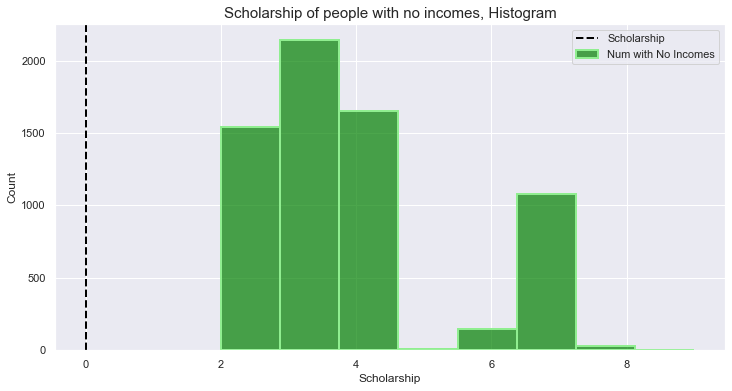

In [55]:
# By scholarship
print("Scholarship")
print(no_incomes['Scholarship'].value_counts())

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(no_incomes['Scholarship'], bins=8, color = 'green', ec = 'lightgreen', lw = 2, alpha = .7, label = 'Num with No Incomes', legend = True)
ax.axvline(0,color='black',linestyle='--',lw=2,label='Scholarship')
ax.set_title('Scholarship of people with no incomes, Histogram', fontsize = 15)
ax.legend();


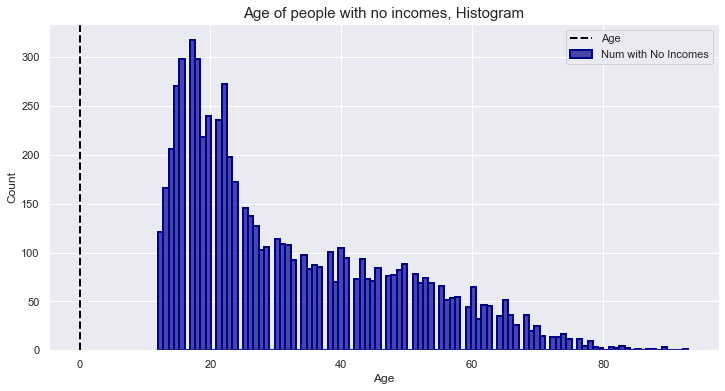

In [60]:
# By Age

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(no_incomes['Age'], bins=100, color = 'darkblue', ec = 'darkblue', lw = 2, alpha = .7, label = 'Num with No Incomes', legend = True)
ax.axvline(0,color='black',linestyle='--',lw=2,label='Age')
ax.set_title('Age of people with no incomes, Histogram', fontsize = 15)
ax.legend();

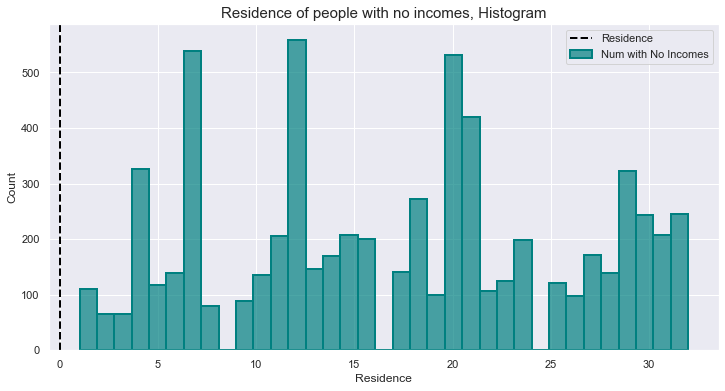

In [58]:
# By Residence

fig, ax = plt.subplots(figsize =(12, 6))
sns.set(color_codes=True)
sns.histplot(no_incomes['Residence'], bins=35, color = 'teal', ec = 'teal', lw = 2, alpha = .7, label = 'Num with No Incomes', legend = True)
ax.axvline(0,color='black',linestyle='--',lw=2,label='Residence')
ax.set_title('Residence of people with no incomes, Histogram', fontsize = 15)
ax.legend();

In [61]:
# Now for the purposes of filling in the nulls we need to get some statistics of the data we have.
